# Time Series Analysis Homework

In all problems do the coding yourself using basic libraries (e.g., `linalg`); that is, don't use TSA libraries (e.g, `statsmodels`).


## Problem 1: Final Project (10)

**Here is the plan for the remainder of the semester:**
* Tue, Nov. 26, text data, ICA only - there is a HW this week
* Thu, Nov. 28, holiday 
* Tue, Dec. 3, practice and test final presentations
* Thu, Dec. 5, final presentations

Your final presentation will be fairly similar to your midterm, but you will add ideas that we have learned from the second half of the semester. In particular, we spent many weeks on linear algebra and regression, as well as time series analysis. If you know any other modeling methods beyond what we learned in this course, feel free to use them. 

There is no restriction on the datasets you use, or the number of datasets! However, do use good metadata practices: be sure the original data, a link to that data, and a citation for your data are all present and easy to find. 

Based on the midterms, we are shifting the focus toward creating a professional product rather than skills such as data integration. 

As before, you will develop a web app. There is one major difference for the final project: **you will not be present when your app is demonstrated.** 

This means the app should function for a user who you do not know. That user should be able to use your app, including understanding everything they need to know, without you. 

Earlier in the semester we did an ICA on the idea of presenting data in various use cases. Here is the use case for the final project:

You work for a company that develops software tools. Your boss has assigned you to build a data-science based web app that the company will consider as one of its new products. The final user of the app will be decided by you (and your dataset), which you will have to convince the company of. *This is to allow you to continue using the same dataset you used for the midterm project.* There will be a demo of your app to your boss’s boss whom you have never met, and, you will not be present for the demo. You learn that your boss’s boss is an expert in data science and has requested that the web app be written to be both self-contained for the end user experience and have “tabs” (e.g., could be literal horizontal selection tabs in the main pane or pages that can be selected in the sidebar) that allows her to see your thinking behind the app. In those tabs/pages, you will put your “work”: IDA, EDA, cleaning, encoding, imputing, modeling, etc. so that she can assess the quality of the data science that led to the end user experience. 

Your app will be given to a group that you are not in and they will act as your boss’s boss in terms of assessing your product. 
___
Things to avoid:
* this should be viewed as a professional product, so do not refer to your “project” in any way
* don’t use jargon; you will not be there to explain anything beyond the functionality of the app
* ensure that there are enough instructions that the user can navigate without you
___
**For this problem, open a markdown cell and list what you need to do to complete this on time. Give a list of tasks and comment on where there is risk. How will you mitigate this risk? You should have a complete plan for having your app done by Dec. 2 so that you can get feedback on the 3rd. Note that on the 3rd you will be "with" your app, but not on the 5th.**



1. Making anyone else understand the diagrams is difficult
2. Making the flow of the project using streamlit is tricky. Should spend more time on that. This is the biggest risk if the streamlit application does not run at the time of evaluation. 
3. The visualizations might not be understandable at the first look, we will have to apply a little focus into the diagrams. 

Mitigation:
1. Build a layout of the application 
2. Encapsulate the project, make it object oriented. 
3. I have done the code in python notebook, I should use that to copy into my streamlit files
4. I have written down the visualizations. 
5. For each diagram, I will give a descriiption. 
6. I will explain each concept in detail 
7. By Sunday, I hope to finish the streamlit as well by applying all the interactive items in the application.



## Problem 2: Textbook (10)

Your textbook does not cover forecasting as a topic in itself. However, you may find yourself working on a forecasting project and you will want to be sure you don't make any mistakes; you can achieve this by using the wisdom that is in your textbook. Find that wisdom and summarize it here. 

To do this, note that when you look up "forecasting" in the index, it points you to "prediction", with several entries, all of which you have already read earlier in the semester. Review all of those entries and write an essay on practical tips for treating time series data science problems. Write this as a guide to your future self. 

The essay should be $\ge 400$ words and cite which section/page each idea and context is drawn from in the textbook. 

You can write that in a markdown cell here. Use good markdown tools like sectioning and lists. Include the bibliographic citations to the sections/pages at the bottom of that cell so that everything is together.

Data forecasting and prediction are widely used in various fields, such as public health, to optimize resource allocation and improve outcomes. By analyzing historical data and identifying correlations with observable features, analysts can predict future events and make informed decisions. Statistical inference is required in understanding wether the relationship found in the sample is a result of a broader phenomena or because of variation in data. It is important to consider all the features that will cause a direct or indirect impact on the predictions. secondly, we must consider whether your sample is representative of the population about which you are trying to make predictions. The very act of using correlations for prediction can sometimes make correlations that held in the past cease to hold in the future. 
For instance, suppose the health department observes a strong correlation between restaurants that are open twenty-four hours a day and health code violations. Based on this correlation, they might start sending health inspectors disproportionately to twenty-four-hour restaurants. As a result, the restaurant might adapt by closing its show from 2:00 to 3:00 a.m. every night. While this small change in operating hours would likely have no impact on cleaning up the restaurant, it would allow the manager to manipulate the system, rendering predictions based on past data inaccurate for the future. 
When it comes to using correlation for prediction, the key is that correlation need not imply causation which means that one feature need not imply that it will cause occurance of another feature. Predictions can be made based on correlation, but they may fail if the relationship is coincidental or influenced by other factors.
Example: Ice cream sales and drowning incidents are positively correlated because both increase in summer. However, buying ice cream doesn’t cause drowning. Using this correlation, you could predict more drownings during high ice cream sales, but assuming causation would lead to false conclusions.
One reason we focus so much on linear relationships is that even non-linear relationships tend to appear approximately linear when we zoom in sufficiently. However, we must be cautious about extrapolating when we zoom in this way. As we move further from the range of data where the relationship is approximately linear, our descriptions of the relationship and, by extension, any predictions we make, become less and less accurate. In most of the cases, predictions get better and better as we include more and more explanatory variables 

## Problem 3: Univariate Time Series Forecasting (10)

Be sure to go through this problem slowly and carefully: the next two problems build on this one.

In this problem you will explore [autoregression](https://en.wikipedia.org/wiki/Autoregressive_model) of order $p$, or AR($p$) for short. You will implement one step ahead forecasting, as you did in the ICA, and vary the number of lags $p$. 

I will provide some code to get you started. This dataset from the National Weather Service contains East Lansing temperatures from 2000 to 2023. Check over this code and we'll continue this dicussion below it. 

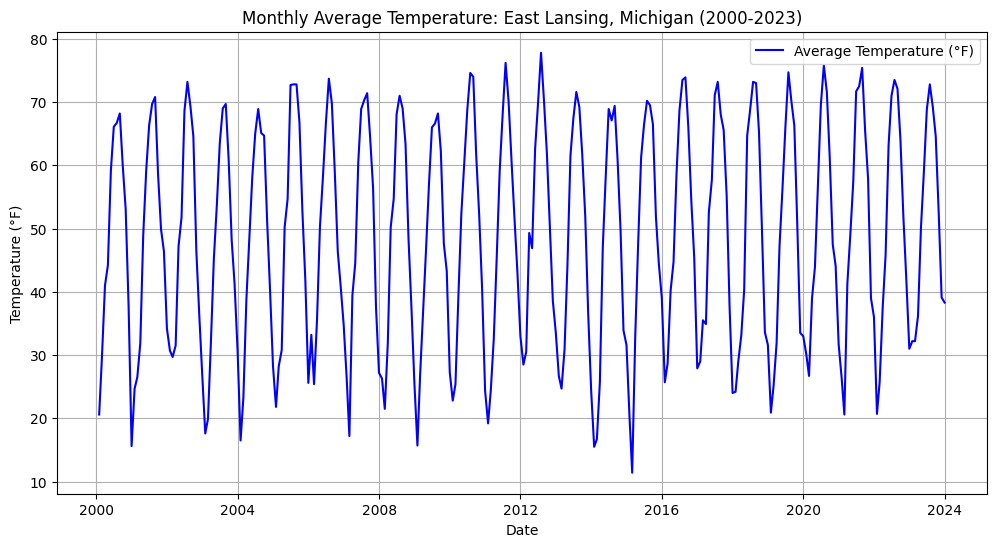

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# East Lansing temperature data (monthly mean average, °F)
east_lansing_temperatures = [
    [20.6, 29.8, 41.0, 44.2, 59.2, 66.1, 66.7, 68.2, 60.1, 53.0, 37.7, 15.6],  # 2000
    [24.7, 26.5, 31.9, 48.9, 59.2, 66.3, 69.7, 70.8, 58.7, 49.9, 46.4, 34.2],  # 2001
    [30.7, 29.7, 31.5, 47.2, 51.8, 68.6, 73.2, 69.3, 64.6, 46.4, 36.4, 26.8],  # 2002
    [17.6, 19.9, 32.3, 45.3, 53.8, 63.5, 69.0, 69.7, 60.8, 48.2, 41.2, 30.7],  # 2003
    [16.5, 23.3, 38.8, 48.2, 58.2, 65.0, 68.9, 65.1, 64.7, 51.3, 40.4, 28.2],  # 2004
    [21.8, 28.2, 30.8, 50.2, 54.7, 72.7, 72.8, 72.8, 66.8, 52.6, 41.8, 25.6],  # 2005
    [33.2, 25.4, 35.7, 50.3, 58.2, 66.6, 73.7, 69.8, 59.1, 46.4, 40.9, 34.8],  # 2006
    [26.4, 17.2, 39.4, 44.6, 60.5, 68.9, 70.3, 71.4, 64.5, 56.4, 37.6, 27.2],  # 2007
    [26.3, 21.5, 31.9, 50.2, 54.7, 68.1, 71.0, 69.0, 63.4, 48.4, 37.6, 25.5],  # 2008
    [15.7, 26.9, 36.8, 46.7, 57.2, 66.0, 66.6, 68.2, 62.2, 47.6, 43.3, 27.3],  # 2009
    [22.8, 25.4, 39.6, 52.4, 60.7, 68.7, 74.6, 74.0, 61.7, 52.2, 40.6, 24.4],  # 2010
    [19.2, 24.4, 32.6, 45.3, 59.1, 67.9, 76.2, 70.1, 60.8, 51.6, 43.1, 33.0],  # 2011
    [28.5, 30.5, 49.3, 46.9, 62.6, 69.8, 77.8, 70.1, 61.8, 50.2, 38.6, 33.5],  # 2012
    [26.7, 24.7, 30.9, 44.2, 61.5, 67.4, 71.6, 69.2, 61.7, 51.9, 36.7, 24.4],  # 2013
    [15.5, 16.7, 25.7, 47.0, 58.4, 68.9, 67.1, 69.4, 60.9, 49.6, 33.9, 31.6],  # 2014
    [20.3, 11.4, 32.7, 47.4, 61.2, 66.4, 70.2, 69.5, 66.5, 51.9, 44.5, 39.0],  # 2015
    [25.7, 28.7, 40.2, 44.7, 58.7, 68.6, 73.5, 73.9, 66.0, 54.3, 45.4, 27.9],  # 2016
    [29.0, 35.5, 34.9, 52.6, 57.7, 71.1, 73.2, 68.0, 65.6, 55.2, 37.7, 24.0],  # 2017
    [24.2, 29.0, 33.1, 40.3, 64.7, 68.7, 73.2, 73.0, 65.3, 49.6, 33.6, 31.6],  # 2018
    [20.9, 25.2, 31.9, 47.2, 56.4, 66.1, 74.7, 70.1, 66.3, 50.4, 33.5, 33.0],  # 2019
    [30.2, 26.7, 39.0, 43.9, 56.7, 69.5, 75.8, 71.6, 61.2, 47.5, 44.1, 31.7],  # 2020
    [26.4, 20.6, 41.3, 48.9, 57.4, 71.7, 72.5, 75.4, 65.6, 57.9, 39.0, 36.0],  # 2021
    [20.7, 25.8, 37.5, 45.8, 63.2, 71.0, 73.5, 72.1, 64.2, 51.8, 42.0, 31.0],  # 2022
    [32.2, 32.2, 36.2, 50.0, 59.1, 68.8, 72.8, 69.2, 64.6, 52.4, 39.1, 38.3],  # 2023
]

# flatten the data
temperature_data = np.array(east_lansing_temperatures).flatten()

# create a time index (monthly from January 2000)
dates = pd.date_range(start="2000-01", periods=len(temperature_data), freq="ME")

# create a DataFrame
df = pd.DataFrame({"Date": dates, "Temperature": temperature_data})

# clot the data
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Temperature"], label="Average Temperature (°F)", color="blue")
plt.title("Monthly Average Temperature: East Lansing, Michigan (2000-2023)")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.grid()
plt.show()
df.to_csv("east_lansing_temperature.csv", index=False)
# Save the DataFrame to a CSV file if you want to use it elsewhere
# df.to_csv("east_lansing_temperature.csv", index=False)
# print("Data saved to 'east_lansing_temperature.csv'.")


Write down the AR($p$) model (mathematically) and show how to convert it into matrix equations for use with the one step ahead method. Put your final equation in the form $ax=b$, where $x$ is what you are solving for, $a$ is the matrix of coefficients (from the data) and $b$ is the dependent variable (the target you want to predict using the data). Note that the shape of these objects will depend on your choice of $p$, which you will want to vary.

Be sure to do any preprocessing of the data you feel is necessary, such as removing the average value (or allow for a constant in your equations). Break the data into two pieces so that you can see how well your forecasts work as you vary $p$. You will want to vary $p$ from $1$ to.....whatever you want: see what values give you good forecasts. See if you can find any rules of thumb. As a hint, $p=$ will tend to just decay from the starting value to the mean (which should be zero in your case). And, when $p\ge 2$, the forecast can have oscillations; but, the training time span needs to be wide enough to see them. 

Create a train-test split.

Use any `linalg` library you wish: the Moore-Penrose pseudoinverse _or_ `.pinv()` _or_ use `.solve`, which is a much more [direct way to solve these equations](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html).  

This is roughly what your code will look like. There are some tedious steps to get the data from its current form into matrix form:

AR(p) model is give ny the formula 
$y_t$ =${\phi}_1$* $x_{t-1}$+ ${\phi}_2$ * $x_{t-2}$+....+${\phi}_p$ * $x_{t-p}$

$$\text{Consider } y_t = \sum_{i=1}^p \phi_i x_{t-i} + \epsilon_t$$
Matrix representation:
$$\begin{bmatrix} y_p \\ y_{p+1} \ \\ \vdots \\ \ y_n \end{bmatrix} = \begin{bmatrix} x_{p-1} & x_{p-2} & \cdots & x_0 \ \\ x_p & x_{p-1} & \cdots & x_1 \\ \ \vdots & \vdots & \ddots & \vdots \end{bmatrix} \begin{bmatrix} \phi_1 \ \\ \phi_2 \ \\ \vdots \ \\ \phi_p \end{bmatrix}$$
Solve using least squares:
$$\hat{\boldsymbol{\phi}} = (X^TX)^{-1}X^T\mathbf{y}$$
Where:

$X$: Lagged observation matrix
$\mathbf{y}$: Target time series
$\hat{\boldsymbol{\phi}}$: Estimated coefficients

In [3]:
import numpy as np
import pandas as pd

# Assume `temperature_data` is the flattened time series
# Define AR order (p)
p = 10  # Number of lags

# Create lagged matrix A and target vector b
def create_ar_matrix(data, p):
    # Ensure data is a NumPy array
    data = np.array(data)
    
    # Create the lag matrix A
    A = np.column_stack([data[i:len(data)-p+i] for i in range(p)])
    
    # Create the target vector b
    b = data[p:]
    
    return A, b

# Generate A and b
def gen_A_b(p):
    A, b = create_ar_matrix(temperature_data, p)

    # Print A and b shapes
    print("Shape of A (lag matrix):", A.shape)
    print("Shape of b (target vector):", b.shape)

    phi = np.linalg.inv(A.T @ A) @ A.T @ b 

    # Example: Solve for AR coefficients using np.linalg.solve
    # A.T @ A should be invertible for AR coefficients
    # x = np.linalg.solve(A.T @ A, A.T @ b)


    print("AR Coefficients:", phi)
    return phi


In [4]:
temperature_preds = list(temperature_data)

Shape of A (lag matrix): (278, 10)
Shape of b (target vector): (278,)
AR Coefficients: [ 0.29557633  0.14932946  0.04443765  0.00958936 -0.18799158 -0.09251779
 -0.07570789  0.1182414   0.20877733  0.53012914]


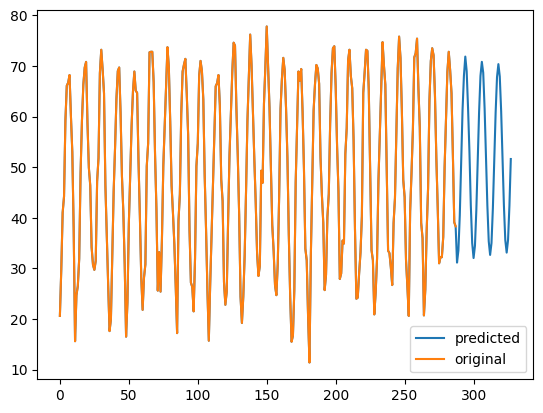

In [8]:
def plot_p(p, phi):
    for i in range(p):
        temp_pred=0
        for j in range(p):
            temp_pred += temperature_preds[len(temperature_preds)-p+j] * phi[j]
        temperature_preds.append(temp_pred)
    plt.plot(temperature_preds, label = 'predicted')
    plt.plot(temperature_data, label ="original")
    plt.legend()


phi = gen_A_b(10)
plot_p(10,phi)


Shape of A (lag matrix): (268, 20)
Shape of b (target vector): (268,)
AR Coefficients: [ 0.04615299 -0.0022067  -0.08516836 -0.03081807 -0.04735938  0.00419968
  0.00652477  0.04023978  0.11528433  0.31956013  0.0432725   0.06140779
 -0.00080675  0.07644663 -0.10678479  0.00998284 -0.03635343  0.09578698
  0.14227272  0.34952318]


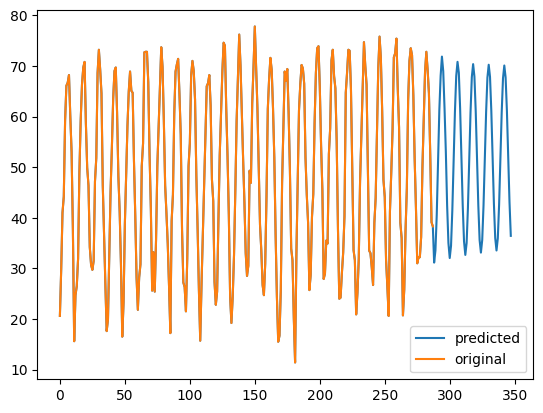

In [9]:
phi = gen_A_b(20)
plot_p(20,phi)

Shape of A (lag matrix): (238, 50)
Shape of b (target vector): (238,)
AR Coefficients: [ 0.08614373  0.09776815  0.04153979  0.06050859  0.00661178  0.08814804
 -0.02437369  0.07329162 -0.03120633  0.02656102 -0.03269398 -0.17602284
 -0.09624606  0.12098363  0.09223109 -0.02938794  0.1490619   0.07582051
 -0.02163246 -0.1608817  -0.08602602 -0.01677889 -0.06506587  0.13796712
  0.03285731 -0.01316046 -0.05316522  0.0642958  -0.08891617 -0.01055715
 -0.03520639  0.11287399  0.00032366  0.03486656 -0.02886924 -0.05200251
 -0.04345215  0.00823561  0.08612374  0.26382464 -0.02079562  0.01235922
 -0.04873517 -0.01329873 -0.03695335  0.10557493  0.03428888  0.10486689
  0.11508649  0.15905585]


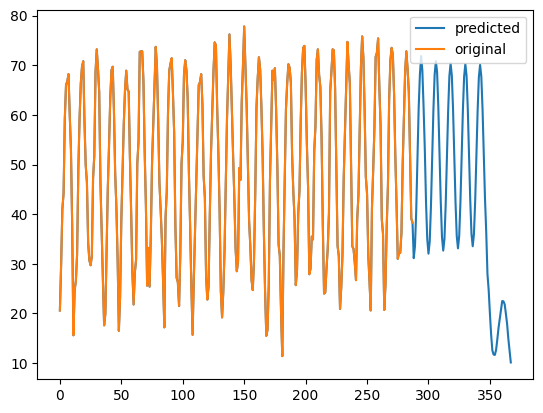

In [10]:
phi = gen_A_b(50)
plot_p(20,phi)

For each value of $p$ plot your forecast with the held-back testing data. This is not using your dataset, but your result should look something like:

![compare](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/02/SES.png)

**Generate several forecasts with different $p$ values and write a discussion in a markdown cell on what you find.**

The predictions traced the path of the training data and using the phi values also able to predict the values for the next p number of instances. The model was able to perform well for the values of 10, 20 but with 50, it seems like the forecasted values could be wrong

## Problem 4: Vector Autoregression (VAR) (10)

Next, perform VAR(p) on multivariate data. The dataset now contains both temperature and precipitation. Forecast both of these simultaneously just as you did in the previous problem (train-test split, vary $p$, etc.) 

This code sets up the (separated) data and plots it. 

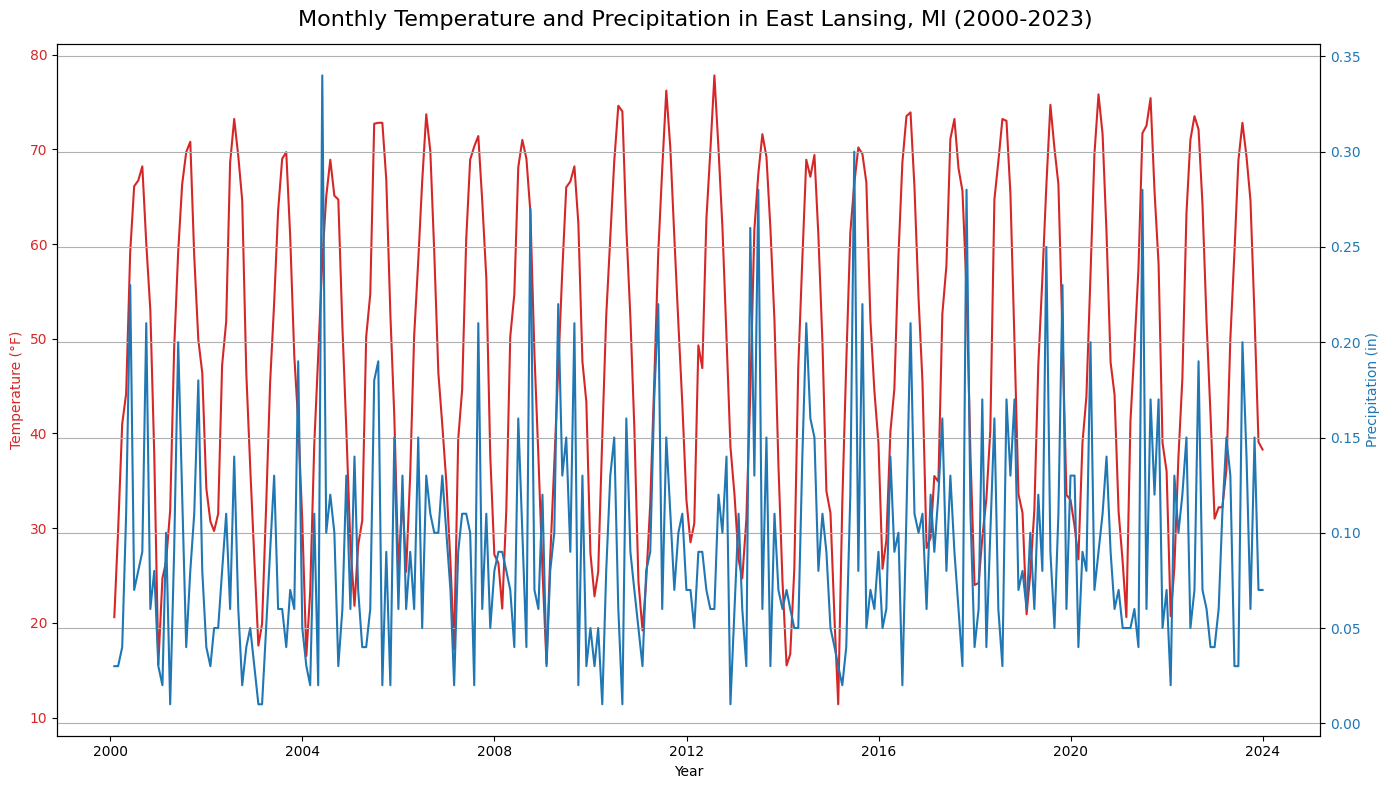

In [11]:
# Aligning precipitation data with the given structure for temperature data

east_lansing_precipitation = [
    [0.03, 0.03, 0.04, 0.11, 0.23, 0.07, 0.08, 0.09, 0.21, 0.06, 0.08, 0.03],  # 2000
    [0.02, 0.10, 0.01, 0.09, 0.20, 0.12, 0.04, 0.08, 0.11, 0.18, 0.08, 0.04],  # 2001
    [0.03, 0.05, 0.05, 0.08, 0.11, 0.06, 0.14, 0.06, 0.02, 0.04, 0.05, 0.03],  # 2002
    [0.01, 0.01, 0.05, 0.09, 0.13, 0.06, 0.06, 0.04, 0.07, 0.06, 0.19, 0.05],  # 2003
    [0.03, 0.02, 0.11, 0.02, 0.34, 0.10, 0.12, 0.10, 0.03, 0.06, 0.13, 0.06],  # 2004
    [0.14, 0.07, 0.04, 0.04, 0.06, 0.18, 0.19, 0.02, 0.09, 0.02, 0.15, 0.06],  # 2005
    [0.13, 0.06, 0.09, 0.06, 0.15, 0.05, 0.13, 0.11, 0.10, 0.10, 0.13, 0.10],  # 2006
    [0.07, 0.02, 0.09, 0.11, 0.11, 0.10, 0.02, 0.21, 0.06, 0.11, 0.05, 0.08],  # 2007
    [0.09, 0.09, 0.08, 0.07, 0.04, 0.16, 0.10, 0.04, 0.27, 0.07, 0.06, 0.12],  # 2008
    [0.03, 0.08, 0.10, 0.22, 0.13, 0.15, 0.09, 0.21, 0.02, 0.13, 0.03, 0.05],  # 2009
    [0.03, 0.05, 0.01, 0.08, 0.13, 0.15, 0.06, 0.01, 0.16, 0.09, 0.07, 0.05],  # 2010
    [0.03, 0.08, 0.09, 0.17, 0.22, 0.06, 0.15, 0.11, 0.07, 0.10, 0.11, 0.07],  # 2011
    [0.07, 0.05, 0.09, 0.09, 0.07, 0.06, 0.06, 0.12, 0.10, 0.14, 0.01, 0.06],  # 2012
    [0.11, 0.06, 0.03, 0.26, 0.13, 0.28, 0.06, 0.15, 0.03, 0.11, 0.07, 0.06],  # 2013
    [0.07, 0.06, 0.05, 0.05, 0.14, 0.21, 0.16, 0.15, 0.08, 0.11, 0.09, 0.05],  # 2014
    [0.04, 0.03, 0.02, 0.04, 0.12, 0.30, 0.08, 0.22, 0.05, 0.07, 0.06, 0.09],  # 2015
    [0.05, 0.06, 0.14, 0.09, 0.10, 0.02, 0.11, 0.21, 0.11, 0.10, 0.11, 0.06],  # 2016
    [0.12, 0.09, 0.12, 0.16, 0.08, 0.13, 0.09, 0.06, 0.03, 0.28, 0.11, 0.04],  # 2017
    [0.06, 0.17, 0.04, 0.10, 0.16, 0.06, 0.03, 0.17, 0.13, 0.17, 0.07, 0.08],  # 2018
    [0.06, 0.10, 0.06, 0.12, 0.08, 0.25, 0.09, 0.05, 0.11, 0.23, 0.06, 0.13],  # 2019
    [0.13, 0.04, 0.09, 0.08, 0.20, 0.07, 0.09, 0.11, 0.14, 0.09, 0.06, 0.07],  # 2020
    [0.05, 0.05, 0.05, 0.06, 0.04, 0.28, 0.06, 0.17, 0.12, 0.17, 0.05, 0.07],  # 2021
    [0.02, 0.13, 0.10, 0.12, 0.15, 0.05, 0.07, 0.19, 0.07, 0.06, 0.04, 0.04],  # 2022
    [0.06, 0.11, 0.15, 0.13, 0.03, 0.03, 0.20, 0.14, 0.06, 0.15, 0.07, 0.07],  # 2023
]

# Flatten the data for plotting
temperature = np.array(east_lansing_temperatures).flatten()
precipitation = np.array(east_lansing_precipitation).flatten()
dates = pd.date_range(start="2000-01", periods=len(temperature), freq="ME")

# Create a plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot temperature
ax1.plot(dates, temperature, label="Temperature (°F)", color="tab:red")
ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature (°F)", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

# Add a second y-axis for precipitation
ax2 = ax1.twinx()
ax2.plot(dates, precipitation, label="Precipitation (in)", color="tab:blue")
ax2.set_ylabel("Precipitation (in)", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# Add title and grid
fig.suptitle("Monthly Temperature and Precipitation in East Lansing, MI (2000-2023)", fontsize=16)
fig.tight_layout()
plt.grid()
plt.show()


Optimal lag order: 11
MSE (Temperature): 14.4762
MSE (Precipitation): 0.0031


/var/folders/0q/vsvgsd3s4ws83m1fcrysjbvc0000gn/T/ipykernel_931/3171856764.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2000-01", periods=len(temperature), freq="M")


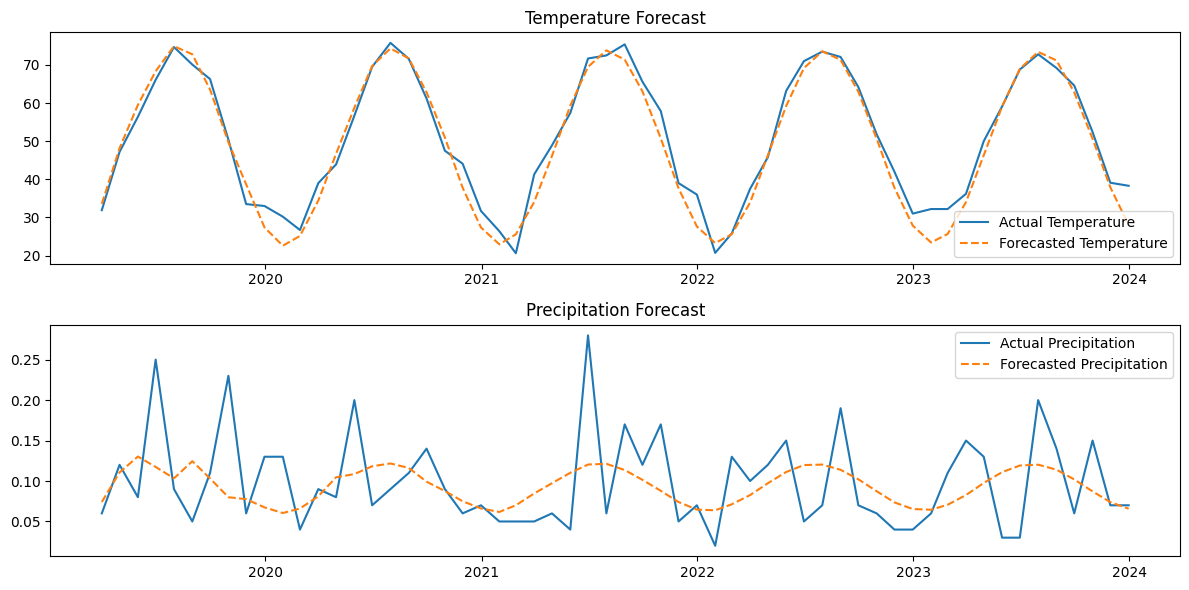

In [12]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Flatten the data
temperature = np.array(east_lansing_temperatures).flatten()
precipitation = np.array(east_lansing_precipitation).flatten()

# Create a DataFrame
dates = pd.date_range(start="2000-01", periods=len(temperature), freq="M")
data = pd.DataFrame({'Temperature': temperature, 'Precipitation': precipitation}, index=dates)

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Fit VAR model and determine optimal lag
model = VAR(train)
results = model.fit(maxlags=15, ic='aic')  # Use AIC to choose lag order
optimal_lag = results.k_ar
print(f"Optimal lag order: {optimal_lag}")

# Forecast
forecast = results.forecast(train.values[-optimal_lag:], steps=len(test))
forecast_df = pd.DataFrame(forecast, columns=['Temperature', 'Precipitation'], index=test.index)

# Evaluate the model
mse_temp = mean_squared_error(test['Temperature'], forecast_df['Temperature'])
mse_precip = mean_squared_error(test['Precipitation'], forecast_df['Precipitation'])
print(f"MSE (Temperature): {mse_temp:.4f}")
print(f"MSE (Precipitation): {mse_precip:.4f}")

# Plot actual vs. forecast
plt.figure(figsize=(12, 6))

# Temperature plot
plt.subplot(2, 1, 1)
plt.plot(test['Temperature'], label='Actual Temperature')
plt.plot(forecast_df['Temperature'], label='Forecasted Temperature', linestyle='dashed')
plt.title('Temperature Forecast')
plt.legend()

# Precipitation plot
plt.subplot(2, 1, 2)
plt.plot(test['Precipitation'], label='Actual Precipitation')
plt.plot(forecast_df['Precipitation'], label='Forecasted Precipitation', linestyle='dashed')
plt.title('Precipitation Forecast')
plt.legend()

plt.tight_layout()
plt.show()


## Problem 5: Causality (10)

You have done a lot of reading and thinking from your textook on **causality**. But, we have not had the tools yet to treat this.....until now! 

Use AR($p$) and one step ahead to forecast temperature using precipitation _and vice versa_. Comment on your findings, and use the results of the previous problem to guide your discussion. That is, in the previous problem you forecasted with both variables and here you can see what happens when you drop one of them. In partiular, does the data suggest that temperture causes precipitation? Does precipitation cause certain temperatures? Do your results agree with what your intuition tells you? Does this test match what you learned about causality in your textbook? Does this test clearly separate correlation from causality? 


Results for lag order p=1:
Temperature forecast improvement with precipitation: 0.00%
Precipitation forecast improvement with temperature: 7.04%

Results for lag order p=2:
Temperature forecast improvement with precipitation: 2.09%
Precipitation forecast improvement with temperature: 10.18%

Results for lag order p=3:
Temperature forecast improvement with precipitation: 2.32%
Precipitation forecast improvement with temperature: 11.09%

Results for lag order p=4:
Temperature forecast improvement with precipitation: 2.13%
Precipitation forecast improvement with temperature: 15.08%

Results for lag order p=5:
Temperature forecast improvement with precipitation: 3.21%
Precipitation forecast improvement with temperature: 14.13%


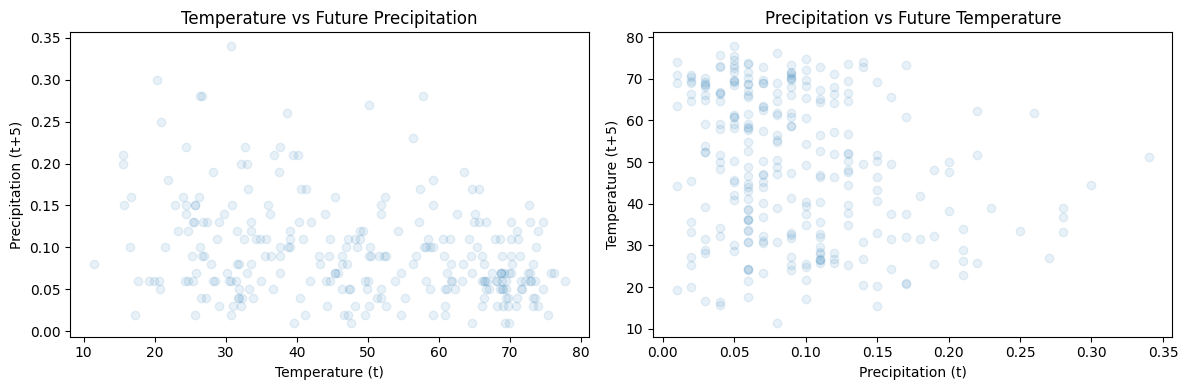

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_lag_features(x, p):
    """Create lag features for a time series."""
    n = len(x)
    X = np.zeros((n-p, p))
    for i in range(p):
        X[:, i] = x[p-i-1:n-i-1]
    return X, x[p:]

def ar_forecast(y, x, p):
    """
    Perform AR(p) forecast using both univariate and bivariate models.
    Returns MSE for both models for comparison.
    """
    # Create lag features
    X_y, y_target = create_lag_features(y, p)
    X_x, _ = create_lag_features(x, p)
    
    # Univariate model (only using target's own lags)
    model_uni = LinearRegression()
    model_uni.fit(X_y, y_target)
    y_pred_uni = model_uni.predict(X_y)
    mse_uni = mean_squared_error(y_target, y_pred_uni)
    
    # Bivariate model (using both variables' lags)
    X_combined = np.hstack([X_y, X_x])
    model_bi = LinearRegression()
    model_bi.fit(X_combined, y_target)
    y_pred_bi = model_bi.predict(X_combined)
    mse_bi = mean_squared_error(y_target, y_pred_bi)
    
    return mse_uni, mse_bi

# Test different lag orders
lag_orders = [1, 2, 3, 4, 5]
for p in lag_orders:
    print(f"\nResults for lag order p={p}:")
    
    # Test if precipitation "causes" temperature
    mse_temp_uni, mse_temp_bi = ar_forecast(temperature, precipitation, p)
    temp_improvement = ((mse_temp_uni - mse_temp_bi) / mse_temp_uni) * 100
    
    # Test if temperature "causes" precipitation
    mse_precip_uni, mse_precip_bi = ar_forecast(precipitation, temperature, p)
    precip_improvement = ((mse_precip_uni - mse_precip_bi) / mse_precip_uni) * 100
    
    print(f"Temperature forecast improvement with precipitation: {temp_improvement:.2f}%")
    print(f"Precipitation forecast improvement with temperature: {precip_improvement:.2f}%")

# Visualize the relationship
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(temperature[:-5], precipitation[5:], alpha=0.1)
plt.xlabel('Temperature (t)')
plt.ylabel('Precipitation (t+5)')
plt.title('Temperature vs Future Precipitation')

plt.subplot(1, 2, 2)
plt.scatter(precipitation[:-5], temperature[5:], alpha=0.1)
plt.xlabel('Precipitation (t)')
plt.ylabel('Temperature (t+5)')
plt.title('Precipitation vs Future Temperature')
plt.tight_layout()
plt.show()

In [ ]:
# Used Claude sonnet